# ML-Exerc01

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [11.5, 3.25], 
          'axes.labelsize': 9,
          'axes.titlesize':12, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 8, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

## Definindo os parâmetros globais e funções

Definindo os digítos finais do RA que serão utilizados em diversas questões.

In [3]:
d4 = 0
d3 = 5
d2 = 7
d1 = 6

Função para gerar uma gaussiana top.

In [4]:
def gerarGaussiana(media, desvPad):
    
    de    = media - 3*desvPad
    ate   = media + 3*desvPad
    passo = 0.001
    
    eixoX = np.arange(de, ate, passo)
    return eixoX, (1/(desvPad*(2*np.pi)**(1/2))) * np.e**((-1/2)*((eixoX-media)/desvPad)**2)

In [5]:
def calcularValorGaussiana(x, media, covariancias):
    #return (1/(desvPadGaussiana*(2*np.pi)**(1/2))) * np.e**((-1/2)*((valorX-mediaGaussiana)/desvPadGaussiana)**2)
    return multivariate_normal.pdf(x, mean=media, cov=covariancias)

In [6]:
def predizer(x, mediapXWa, covarianciaspXWa, mediapXWb, covarianciaspXWb, probWa, probWb):
    
    discriminanteA = probWa * calcularValorGaussiana(x, mediapXWa, covarianciaspXWa)
    discriminanteB = probWb * calcularValorGaussiana(x, mediapXWb, covarianciaspXWb)
    
    if discriminanteA >= discriminanteB:
        return 1
    else:
        return 2

In [7]:
def distanciaEuclidiana(a, b):
    
    somaDiferencasQuadrado = 0
    
    for dimensaoAtual in range(len(a)):
        somaDiferencasQuadrado += (a[dimensaoAtual] - b[dimensaoAtual])**2
        
    return somaDiferencasQuadrado**(1/2)

## Questão 2

#### Itens A e B

In [8]:
# MEDIAS E DESVIOS PADRAO
mediapXWa   = d1
desvPadpXWa = 1
mediapXWb   = d1 + 2
desvPadpXWb = 1

# PROBABILIDADE DE SER DE CADA CLASSE
pWa = 0.5
pWb = 0.5

# PROBABILIDADES CONDICIONAIS
eixoXpXWa, pXWa = gerarGaussiana(mediapXWa, desvPadpXWa)
eixoXpXWb, pXWb = gerarGaussiana(mediapXWb, desvPadpXWb)

# PROB DE CADA CLASSE VEZES AS CONDICIONAIS
pWapXWa = pWa * pXWa
pWbpXWb = pWb * pXWb

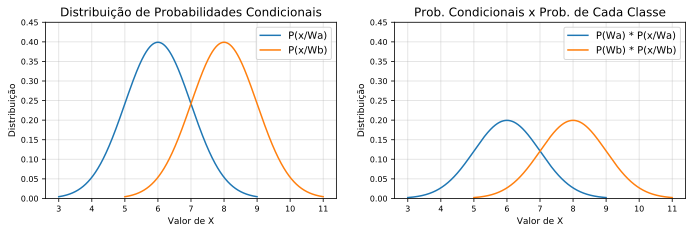

In [9]:
limitesY = [0, 0.45]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(eixoXpXWa, pXWa, label="P(x/Wa)")
ax1.plot(eixoXpXWb, pXWb, label="P(x/Wb)")
ax1.set_title("Distribuição de Probabilidades Condicionais")
ax1.set_xlabel("Valor de X")
ax1.set_ylabel("Distribuição")
ax1.set_ylim(limitesY)
ax1.legend()
ax1.grid(alpha=0.4)

ax2.plot(eixoXpXWa, pWapXWa, label="P(Wa) * P(x/Wa)")
ax2.plot(eixoXpXWb, pWbpXWb, label="P(Wb) * P(x/Wb)")
ax2.set_title("Prob. Condicionais x Prob. de Cada Classe")
ax2.set_xlabel("Valor de X")
ax2.set_ylabel("Distribuição")
ax2.set_ylim(limitesY)
ax2.legend()
ax2.grid(alpha=0.4)

Pelo método gráfico, verifica-se que o limite de decisão é 7. Abaixo desse valor, escolha a classe A, acima, a classe B.

#### Item C

In [10]:
# TOTAL DE SIMULACOES
totalAmostras = 1000

# COMO CADA CLASSE TEM 50% DE CHANCE DE APARECER, ENTAO SAO 500 AMOSTRAS PRA CADA
x = np.append(np.random.normal(mediapXWa, desvPadpXWa, int(totalAmostras * pWa)), np.random.normal(mediapXWb, desvPadpXWb, int(totalAmostras * pWb)))
y = np.append(np.full((int(totalAmostras * pWa)),1), np.full((int(totalAmostras * pWb)),2))

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(x, y):
    classePredita = predizer(xAtual, mediapXWa, desvPadpXWa, mediapXWb, desvPadpXWb, pWa, pWb)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Taxa de Erros:", 1 - acuracia)

Acurácia: 0.825
Taxa de Erros: 0.17500000000000004


## Questão 3

#### Itens A e B

In [11]:
# MEDIAS E DESVIOS PADRAO
mediapXWa   = 7
desvPadpXWa = 1
mediapXWb   = 7
desvPadpXWb = 4

# PROBABILIDADE DE SER DE CADA CLASSE
pWa = 0.5
pWb = 0.5

# PROBABILIDADES CONDICIONAIS
eixoXpXWa, pXWa = gerarGaussiana(mediapXWa, desvPadpXWa)
eixoXpXWb, pXWb = gerarGaussiana(mediapXWb, desvPadpXWb)

# PROB DE CADA CLASSE VEZES AS CONDICIONAIS
pWapXWa = pWa * pXWa
pWbpXWb = pWb * pXWb

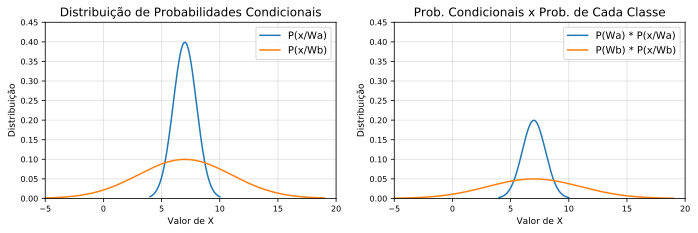

In [12]:
limitesX = [-5, 20]
limitesY = [0, 0.45]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(eixoXpXWa, pXWa, label="P(x/Wa)")
ax1.plot(eixoXpXWb, pXWb, label="P(x/Wb)")
ax1.set_title("Distribuição de Probabilidades Condicionais")
ax1.set_xlabel("Valor de X")
ax1.set_ylabel("Distribuição")
ax1.set_xlim(limitesX)
ax1.set_ylim(limitesY)
ax1.legend()
ax1.grid(alpha=0.4)

ax2.plot(eixoXpXWa, pWapXWa, label="P(Wa) * P(x/Wa)")
ax2.plot(eixoXpXWb, pWbpXWb, label="P(Wb) * P(x/Wb)")
ax2.set_title("Prob. Condicionais x Prob. de Cada Classe")
ax2.set_xlabel("Valor de X")
ax2.set_ylabel("Distribuição")
ax2.set_xlim(limitesX)
ax2.set_ylim(limitesY)
ax2.legend()
ax2.grid(alpha=0.4)

#### Item C

In [13]:
# TOTAL DE SIMULACOES
totalAmostras = 1000

# COMO CADA CLASSE TEM 50% DE CHANCE DE APARECER, ENTAO SAO 500 AMOSTRAS PRA CADA
x = np.append(np.random.normal(mediapXWa, desvPadpXWa, int(totalAmostras * pWa)), np.random.normal(mediapXWb, desvPadpXWb, int(totalAmostras * pWb)))
y = np.append(np.full((int(totalAmostras * pWa)),1), np.full((int(totalAmostras * pWb)),2))

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(x, y):
    classePredita = predizer(xAtual, mediapXWa, desvPadpXWa, mediapXWb, desvPadpXWb, pWa, pWb)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Taxa de Erros:", 1 - acuracia)

Acurácia: 0.8
Taxa de Erros: 0.19999999999999996


## Questão 4

#### Item B

In [14]:
# MEDIAS E DESVIOS PADRAO
mediapXWa   = d2
desvPadpXWa = 1
mediapXWb   = d2 + 3
desvPadpXWb = 1

# PROBABILIDADE DE SER DE CADA CLASSE
pWa = 0.99
pWb = 0.01

# PROBABILIDADES CONDICIONAIS
eixoXpXWa, pXWa = gerarGaussiana(mediapXWa, desvPadpXWa)
eixoXpXWb, pXWb = gerarGaussiana(mediapXWb, desvPadpXWb)

# PROB DE CADA CLASSE VEZES AS CONDICIONAIS
pWapXWa = pWa * pXWa
pWbpXWb = pWb * pXWb

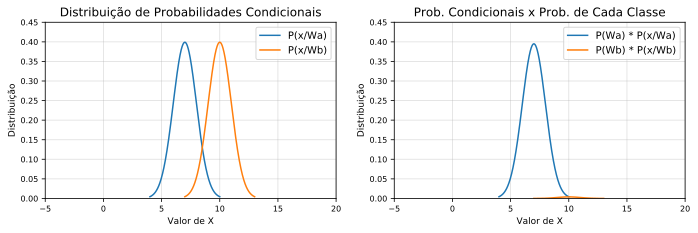

In [15]:
limitesX = [-5, 20]
limitesY = [0, 0.45]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(eixoXpXWa, pXWa, label="P(x/Wa)")
ax1.plot(eixoXpXWb, pXWb, label="P(x/Wb)")
ax1.set_title("Distribuição de Probabilidades Condicionais")
ax1.set_xlabel("Valor de X")
ax1.set_ylabel("Distribuição")
ax1.set_xlim(limitesX)
ax1.set_ylim(limitesY)
ax1.legend()
ax1.grid(alpha=0.4)

ax2.plot(eixoXpXWa, pWapXWa, label="P(Wa) * P(x/Wa)")
ax2.plot(eixoXpXWb, pWbpXWb, label="P(Wb) * P(x/Wb)")
ax2.set_title("Prob. Condicionais x Prob. de Cada Classe")
ax2.set_xlabel("Valor de X")
ax2.set_ylabel("Distribuição")
ax2.set_xlim(limitesX)
ax2.set_ylim(limitesY)
ax2.legend()
ax2.grid(alpha=0.4)

#### Classe 1: saudável
#### Classe 2: doente

In [16]:
# TOTAL DE SIMULACOES
totalAmostras = 10000

# CONSTRUINDO O VETOR DE DADOS X E O VETOR "TARGET" Y
x = np.append(np.random.normal(mediapXWa, desvPadpXWa, int(totalAmostras * pWa)), np.random.normal(mediapXWb, desvPadpXWb, int(totalAmostras * pWb)))
y = np.append(np.full((int(totalAmostras * pWa)),1), np.full((int(totalAmostras * pWb)),2))

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
TP = 0
TN = 0
FP = 0
FN = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(x, y):
    classePredita = predizer(xAtual, mediapXWa, desvPadpXWa, mediapXWb, desvPadpXWb, pWa, pWb)
    
    if classePredita == classeCorreta and classeCorreta == 2:
        # PESSOA DOENTE E EXAME POSITIVO
        TP += 1
    elif classePredita != classeCorreta and classeCorreta == 2:
        # PESSOA DOENTE E EXAME NEGATIVO
        FN += 1
    elif classePredita == classeCorreta and classeCorreta == 1:
        # PESSOA SAUDAVEL E EXAME NEGATIVO
        TN += 1
    else:
        # PESSOA SAUDAVEL E EXAME POSITIVO
        FP += 1
        
# CALCULO DAS METRICAS
acuracia        = (TP + TN) / (TP + TN + FP + FN)
mediaPrecisoes  = ((TP/(TP+FP)) + (TN/(FN+TN)))/2
mediaRevocacoes = ((TP/(TP+FN)) + (TN/(FP+TN)))/2

# PRINTS
print("Acurácia:", acuracia)
print("Taxa de Erros:", 1 - acuracia)
print("Precisão Média:", mediaPrecisoes)
print("Revocação Média:", mediaRevocacoes)

print("\nTABELA:")
print(FP, TP)
print(TN, FN)

Acurácia: 0.9937
Taxa de Erros: 0.006299999999999972
Precisão Média: 0.9154668860551214
Revocação Média: 0.7295454545454546

TABELA:
9 46
9891 54


## Questão 5

In [17]:
#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [6, 4], 
          'axes.labelsize': 9,
          'axes.titlesize':12, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 8, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

### Item D (a)

Acurácia: 0.999
Total amostras: 1000
Erros: 1
Taxa de Erros: 0.0010000000000000009


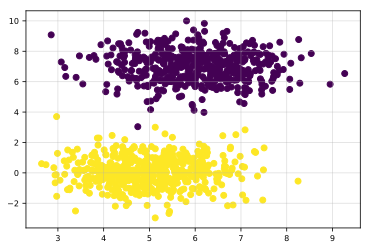

In [18]:
# DEFININDO AS CONDICOES INICIAIS
vetorMediasClasseA        = [d1, d2]
matrizCovarianciasClasseA = [[1,0],[0,1]]
vetorMediasClasseB        = [d3, d4]
matrizCovarianciasClasseB = [[1,0],[0,1]]
probClasseA = 0.5
probClasseB = 0.5

# TOTAL DE SIMULACOES
totalAmostras = 1000

# CONSTRUINDO O VETOR DE DADOS X E O VETOR "TARGET" Y
xa = np.append(multivariate_normal.rvs(mean=vetorMediasClasseA, cov=matrizCovarianciasClasseA, size=int(totalAmostras * probClasseA)), multivariate_normal.rvs(mean=vetorMediasClasseB, cov=matrizCovarianciasClasseB, size=int(totalAmostras * probClasseB)), axis=0)
ya = np.append(np.full((int(totalAmostras * probClasseA)), 1), np.full((int(totalAmostras * probClasseB)), 2))

# PLOTANDO OS DADOS
plt.scatter(xa[:,0], xa[:,1], c=ya)
plt.grid(alpha=0.4)

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(xa, ya):
    classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

### Item D (b)

Acurácia: 0.997
Total amostras: 1000
Erros: 3
Taxa de Erros: 0.0030000000000000027


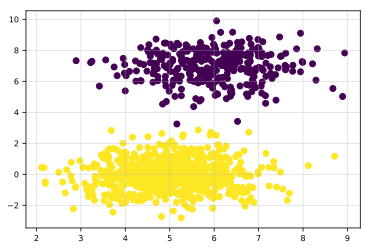

In [19]:
# DEFININDO AS CONDICOES INICIAIS
vetorMediasClasseA        = [d1, d2]
matrizCovarianciasClasseA = [[1,0],[0,1]]
vetorMediasClasseB        = [d3, d4]
matrizCovarianciasClasseB = [[1,0],[0,1]]
probClasseA = 1/3
probClasseB = 2/3

# TOTAL DE SIMULACOES
totalAmostras = 1000

# CONSTRUINDO O VETOR DE DADOS X E O VETOR "TARGET" Y
xb = np.append(multivariate_normal.rvs(mean=vetorMediasClasseA, cov=matrizCovarianciasClasseA, size=int(totalAmostras * probClasseA)), multivariate_normal.rvs(mean=vetorMediasClasseB, cov=matrizCovarianciasClasseB, size=int(totalAmostras * probClasseB)), axis=0)
yb = np.append(np.full((int(totalAmostras * probClasseA)), 1), np.full((int(totalAmostras * probClasseB)), 2))

# PLOTANDO OS DADOS
plt.scatter(xb[:,0], xb[:,1], c=yb)
plt.grid(alpha=0.4)

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(xb, yb):
    classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

### Item D (c)

Acurácia: 0.991
Total amostras: 1000
Erros: 9
Taxa de Erros: 0.009000000000000008


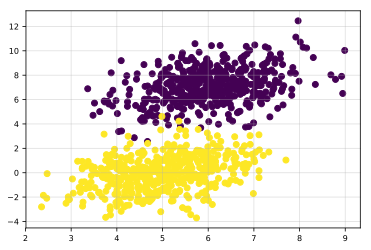

In [20]:
# DEFININDO AS CONDICOES INICIAIS
vetorMediasClasseA        = [d1, d2]
matrizCovarianciasClasseA = [[1,0.5],[0.5,2]]
vetorMediasClasseB        = [d3, d4]
matrizCovarianciasClasseB = [[1,0.5],[0.5,2]]
probClasseA = 0.5
probClasseB = 0.5

# TOTAL DE SIMULACOES
totalAmostras = 1000

# CONSTRUINDO O VETOR DE DADOS X E O VETOR "TARGET" Y
xc = np.append(multivariate_normal.rvs(mean=vetorMediasClasseA, cov=matrizCovarianciasClasseA, size=int(totalAmostras * probClasseA)), multivariate_normal.rvs(mean=vetorMediasClasseB, cov=matrizCovarianciasClasseB, size=int(totalAmostras * probClasseB)), axis=0)
yc = np.append(np.full((int(totalAmostras * probClasseA)), 1), np.full((int(totalAmostras * probClasseB)), 2))

# PLOTANDO OS DADOS
plt.scatter(xc[:,0], xc[:,1], c=yc)
plt.grid(alpha=0.4)

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(xc, yc):
    classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

### Item E (b)

In [21]:
# DEFININDO AS CONDICOES INICIAIS
vetorMediasClasseA        = [d1, d2]
matrizCovarianciasClasseA = [[1,0],[0,1]]
vetorMediasClasseB        = [d3, d4]
matrizCovarianciasClasseB = [[1,0],[0,1]]
probClasseA = 0.5
probClasseB = 0.5

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(xb, yb):
    classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

Acurácia: 0.998
Total amostras: 1000
Erros: 2
Taxa de Erros: 0.0020000000000000018


### Item E (c)

In [22]:
# DEFININDO AS CONDICOES INICIAIS
vetorMediasClasseA        = [d1, d2]
matrizCovarianciasClasseA = [[1,0],[0,1]]
vetorMediasClasseB        = [d3, d4]
matrizCovarianciasClasseB = [[1,0],[0,1]]
probClasseA = 0.5
probClasseB = 0.5

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(xc, yc):
    classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

Acurácia: 0.992
Total amostras: 1000
Erros: 8
Taxa de Erros: 0.008000000000000007


## Questão 6

#### Item B

Acurácia: 0.992
Total amostras: 2000
Erros: 16
Taxa de Erros: 0.008000000000000007


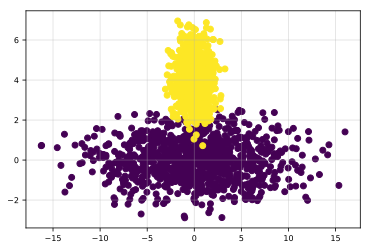

In [32]:
# DEFININDO AS CONDICOES INICIAIS
vetorMediasClasseA        = [0, 0]
matrizCovarianciasClasseA = [[20+d1,0],[0,1]]
vetorMediasClasseB        = [0, 4]
matrizCovarianciasClasseB = [[1,0],[0,1]]
probClasseA = 0.5
probClasseB = 0.5

# TOTAL DE SIMULACOES
totalAmostras = 2000

# CONSTRUINDO O VETOR DE DADOS X E O VETOR "TARGET" Y
x = np.append(multivariate_normal.rvs(mean=vetorMediasClasseA, cov=matrizCovarianciasClasseA, size=int(totalAmostras * probClasseA)), multivariate_normal.rvs(mean=vetorMediasClasseB, cov=matrizCovarianciasClasseB, size=int(totalAmostras * probClasseB)), axis=0)
y = np.append(np.full((int(totalAmostras * probClasseA)), 1), np.full((int(totalAmostras * probClasseB)), 2))

# PLOTANDO OS DADOS
plt.scatter(x[:,0], x[:,1], c=y)
plt.grid(alpha=0.4)

# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(x, y):
    classePredita = predizer(xAtual, vetorMediasClasseA, matrizCovarianciasClasseA, vetorMediasClasseB, matrizCovarianciasClasseB, probClasseA, probClasseB)
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

#### Item C

Classificador de menor distância. Na célula acima eu já criei o dataset, basta usar a distância como parâmetro, agora.

In [33]:
# VARIAVEL PARA CONTAR OS ACERTOS. DEPOIS E SO CALCULAR ACURACIA
acertos = 0

# PASSANDO POR CADA ELEMENTO DO VETOR DE X'S PARA FAZER A PREDICAO
for xAtual, classeCorreta in zip(x, y):
    
    distanciaCentroideA = distanciaEuclidiana(xAtual, vetorMediasClasseA)
    distanciaCentroideB = distanciaEuclidiana(xAtual, vetorMediasClasseB)
    
    classePredita = 1
    if distanciaCentroideB < distanciaCentroideA:
        classePredita = 2
    
    if classePredita == classeCorreta:
        acertos += 1
        
# CALCULO A ACURACIA
acuracia = acertos / totalAmostras
print("Acurácia:", acuracia)
print("Total amostras:", totalAmostras)
print("Erros:", totalAmostras - acertos)
print("Taxa de Erros:", 1 - acuracia)

Acurácia: 0.9825
Total amostras: 2000
Erros: 35
Taxa de Erros: 0.01749999999999996
